In [1]:
import os
# from google.colab import drive

from PIL import Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# import warnings
# warnings.filterwarnings("ignore")


In [2]:
# !pip freeze > requiriments.txt

In [3]:
# Para leer del GoogleDrive...
URL =  "https://drive.google.com/drive/folders/1vkv9wVGqbJz4vFr9KYuiB6BSLScEG9j1?usp=drive_link"
# drive.mount('/content/drive', force_remount=True)
# datadir = '/content/drive/MyDrive/Colab Notebooks/RNP/Aves/'
# datadir = URL

datadir = './'

os.chdir(datadir)
os.getcwd()

'c:\\Personal\\Maestría en Ciencia de Datos\\Asignaturas\\04 - Redes Neuronales Profundas\\Ejercicios\\Aves'

In [4]:
#!ls
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 2E69-F39C

 Directorio de c:\Personal\Maestr�a en Ciencia de Datos\Asignaturas\04 - Redes Neuronales Profundas\Ejercicios\Aves

02/05/2024  12:35 am    <DIR>          .
08/04/2024  06:36 pm    <DIR>          ..
18/04/2024  07:00 pm     2.099.628.449 archive.zip
01/05/2024  09:57 pm         1.206.723 Aves - Kaggle.ipynb
02/05/2024  12:38 am         1.228.931 Aves_Kaggle_Local.ipynb
20/04/2023  01:53 pm         6.932.617 birds.csv
01/05/2024  11:14 pm               189 Convertir a py.bat
18/04/2024  07:09 pm    <DIR>          dataset
20/04/2023  01:52 pm        77.494.628 EfficientNetB0-525-(224 X 224)- 98.97 (Original).h5
01/05/2024  11:57 pm        38.377.188 EfficientNetB0-525-(224 X 224)- 98.97.h5
08/04/2024  06:34 pm        70.132.838 EfficientNetB0-525-(224 X 224)- 98.97.h5.zip
20/04/2023  01:53 pm            16.988 ejemplo_imagen.jpg
29/04/2024  05:30 pm                47 Fofo.txt
01/05/2024  10:59 p

In [5]:
# Configurar el generador de datos de imagen...
img_datagen = ImageDataGenerator()


BATCH_SIZE = 32

# Cargar los conjuntos de datos de entrenamiento, prueba y validación utilizando ImageDataGenerator...

# Conjunto de datos de entrenamiento
train_dataset = img_datagen.flow_from_directory(
    "./dataset/train",  # Ruta al directorio de entrenamiento que contiene subdirectorios de clases
    target_size=(224, 224),  # Tamaño al que se redimensionan todas las imágenes
    batch_size=BATCH_SIZE  # Tamaño del lote para cargar las imágenes
)

# Conjunto de datos de prueba
test_dataset = img_datagen.flow_from_directory(
    "./dataset/test",  # Ruta al directorio de prueba que contiene subdirectorios de clases
    target_size=(224, 224),  # Tamaño al que se redimensionan todas las imágenes
    batch_size=BATCH_SIZE,  # Tamaño del lote para cargar las imágenes
    shuffle=False  # Deshabilitar la mezcla de los datos, ya que no se realizará entrenamiento durante la evaluación
)

# Conjunto de datos de validación
val_dataset = img_datagen.flow_from_directory(
    "./dataset/valid",  # Ruta al directorio de validación que contiene subdirectorios de clases
    target_size=(224, 224),  # Tamaño al que se redimensionan todas las imágenes
    batch_size=BATCH_SIZE,  # Tamaño del lote para cargar las imágenes
    shuffle=False  # Deshabilitar la mezcla de los datos, ya que no se realizará entrenamiento durante la validación
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [6]:
# Obtener el diccionario de nombres de clase
dict_class_names = train_dataset.class_indices
clases = list(dict_class_names.keys())

# Total de clases...
total_clases = len(clases)
print(f"Total de clases: {total_clases}")

Total de clases: 525


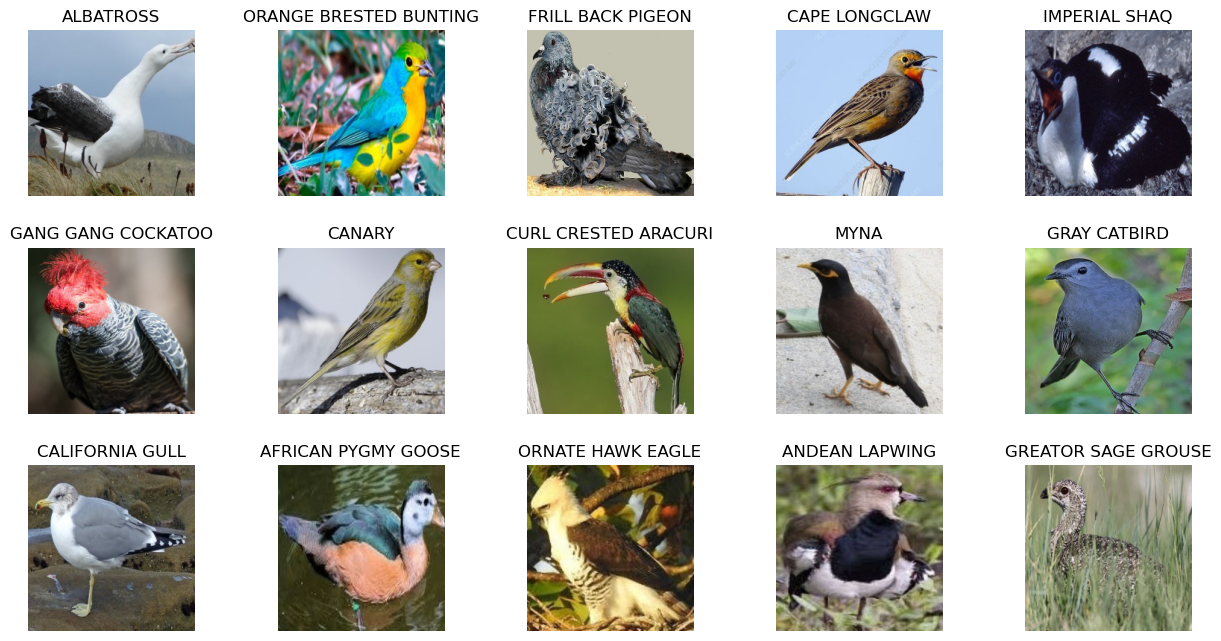

In [7]:
# Tomar un lote de imágenes y etiquetas del iterador
images, labels = next(train_dataset)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(15, 8))

# Obtener el índice de la clase predicha para cada etiqueta en el lote


# Visualizar las primeras 9 imágenes del lote
for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    image = images[i] / 255
    predicted_classes = np.argmax(labels[i])
    clase = clases[predicted_classes]

    plt.imshow(image)

    plt.title(clase)  # Utilizar predicted_classes en lugar de labels_int
    plt.axis("off")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [8]:
# Mostrar el image_size de las imágenes en el conjunto de datos de entrenamiento
print("Image size del conjunto de datos de entrenamiento:", train_dataset.target_size)

# Mostrar el image_size de las imágenes en el conjunto de datos de prueba
print("Image size del conjunto de datos de prueba:", test_dataset.target_size)

# Mostrar el image_size de las imágenes en el conjunto de datos de validación
print("Image size del conjunto de datos de validación:", val_dataset.target_size)

Image size del conjunto de datos de entrenamiento: (224, 224)
Image size del conjunto de datos de prueba: (224, 224)
Image size del conjunto de datos de validación: (224, 224)


In [9]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = train_dataset.target_size + (3,)

In [10]:
# from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
base_model1 = tf.keras.applications.EfficientNetV2B3

In [11]:
# Leyendo el modelo pre-entrenado... EfficientNetB0-525-(224 X 224)- 98.97.h5...
"""
base_model = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
"""
# Este modelo a pesar de la eficiencia que se le describe resultó no eficiente con este código...

# Probar otras sugerencias...
base_model = tf.keras.applications.EfficientNetV2B3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               include_preprocessing = False)


base_model.trainable = False

# Arquitectura del Modelo base...
#base_model.summary()



52606240/52606240 [==============================] - 11s 0us/step


In [12]:
model_tl = Sequential([
    tf.keras.Input(shape=IMG_SHAPE),
    Rescaling(1./255, input_shape=IMG_SHAPE),
    base_model,
    tf.keras.layers.GlobalMaxPooling2D(name = 'max_pooling'),
    tf.keras.layers.BatchNormalization(name = 'batch_norm'),
    Dense(1000, activation = 'relu'),
    Dropout(0.3),
    Dense(total_clases, activation='softmax')
])

model_tl.build(input_shape=(None, *IMG_SHAPE))
# model_tl.summary()

In [13]:
base_learning_rate = 0.001
model_tl.compile(optimizer=Adamax(learning_rate = base_learning_rate),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

model_tl.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-b3 (Functio  (None, 7, 7, 1536)        12930622  
 nal)                                                            
                                                                 
 max_pooling (GlobalMaxPool  (None, 1536)              0         
 ing2D)                                                          
                                                                 
 batch_norm (BatchNormaliza  (None, 1536)              6144      
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1000)              1537000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
          

In [14]:
# Definir Early Stopping...
early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 5,
                               mode = "min")

# Directorio donde se guardarán los pesos del modelo en Google Drive
checkpoint_path = './EfficientNetB0-525-(224 X 224)- 98.97.h5'

checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             monitor="val_accuracy",
                             mode = "max",
                             # verbose=1,
                             save_best_only=True)

In [16]:
num_epochs = 20

# Entrenar el modelo con Early Stopping...
history = model_tl.fit(train_dataset,
                       epochs=num_epochs,
                       validation_data=val_dataset,
                       callbacks=[checkpoint, early_stopping],
                       verbose = 1)

Epoch 1/20
2645/2645 [==============================] - ETA: 0s - loss: 1.7928 - accuracy: 0.5768

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2645/2645 [==============================] - 3113s 1s/step - loss: 1.7928 - accuracy: 0.5768 - val_loss: 0.4735 - val_accuracy: 0.8720
Epoch 2/20
2645/2645 [==============================] - 3195s 1s/step - loss: 0.9586 - accuracy: 0.7534 - val_loss: 0.3424 - val_accuracy: 0.9090
Epoch 3/20
2645/2645 [==============================] - 3071s 1s/step - loss: 0.7375 - accuracy: 0.8035 - val_loss: 0.3130 - val_accuracy: 0.9158
Epoch 4/20
2645/2645 [==============================] - 3075s 1s/step - loss: 0.6232 - accuracy: 0.8319 - val_loss: 0.2707 - val_accuracy: 0.9257
Epoch 5/20
2645/2645 [==============================] - 3039s 1s/step - loss: 0.5456 - accuracy: 0.8506 - val_loss: 0.2649 - val_accuracy: 0.9295
Epoch 6/20
2645/2645 [==============================] - 2977s 1s/step - loss: 0.4844 - accuracy: 0.8651 - val_loss: 0.2602 - val_accuracy: 0.9307
Epoch 7/20
2645/2645 [==============================] - 3004s 1s/step - loss: 0.4433 - accuracy: 0.8746 - val_loss: 0.2417 - val_accura

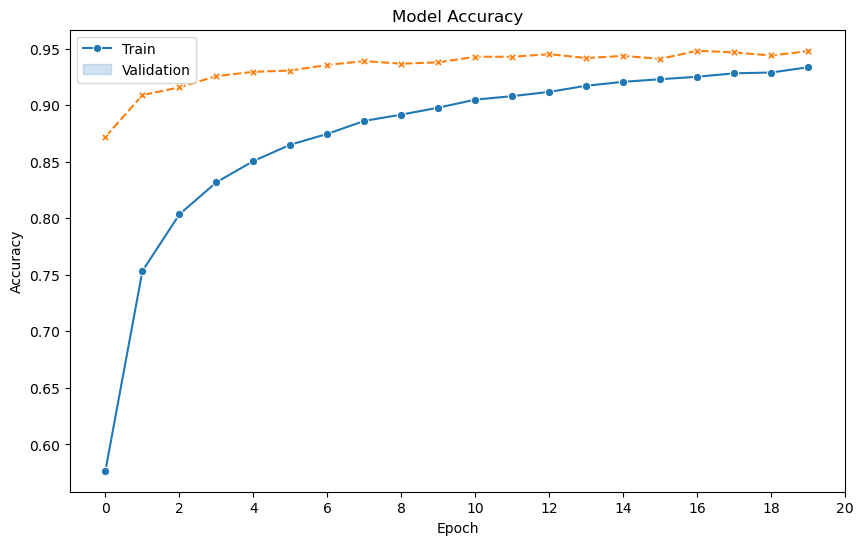

In [24]:
# Crear un DataFrame a partir del historial
history_df = pd.DataFrame(history.history)

# Graficar usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], markers=True)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 21, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

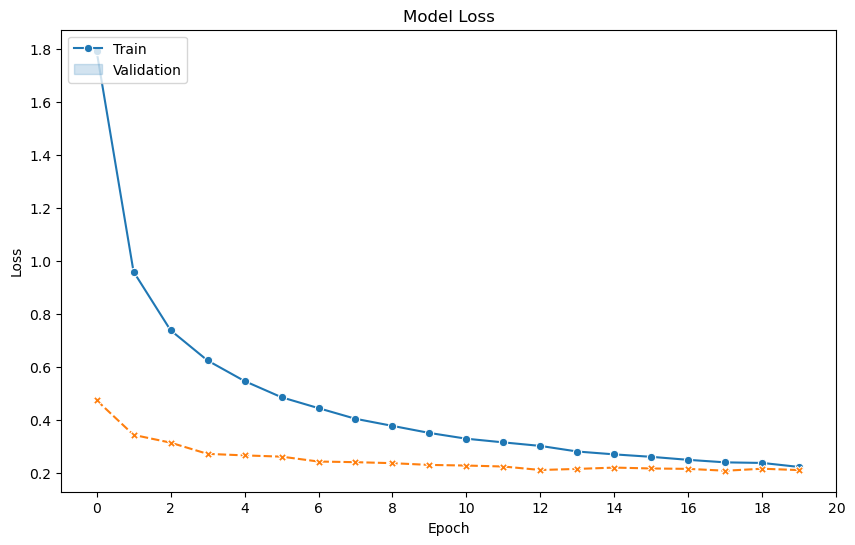

In [25]:
# Graficar usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']], markers=True)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 21, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
model_tl.save("EfficientNetV2B3-525-(224 X 224)- 94.78.h5")